In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

# Load the data
data = pd.read_csv('Bitcoin CZ.csv')

# Convert 'Date' to datetime and set as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Create a target variable for classification (1 if price increased, 0 otherwise)
data['Target'] = (data['Close'].diff() > 0).astype(int)

# Forward fill to handle missing values if any
data.fillna(method='ffill', inplace=True)



In [12]:
from sklearn.model_selection import train_test_split

# Defining features and target
X = data.drop(['Target', 'Close'], axis=1)  # Drop 'Close' if it's not to be used as a feature
y = data['Target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## RandomForestClassifer

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Predictions
y_pred = model.predict(X_test)

# Accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))




Accuracy: 0.8472222222222222
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       118
           1       0.84      0.82      0.83        98

    accuracy                           0.85       216
   macro avg       0.85      0.84      0.85       216
weighted avg       0.85      0.85      0.85       216



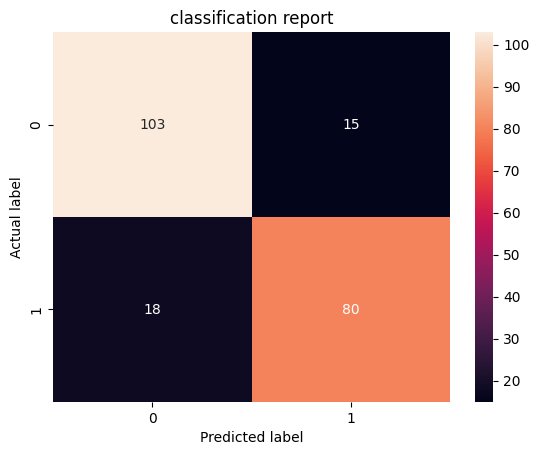

In [15]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.title('classification report')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


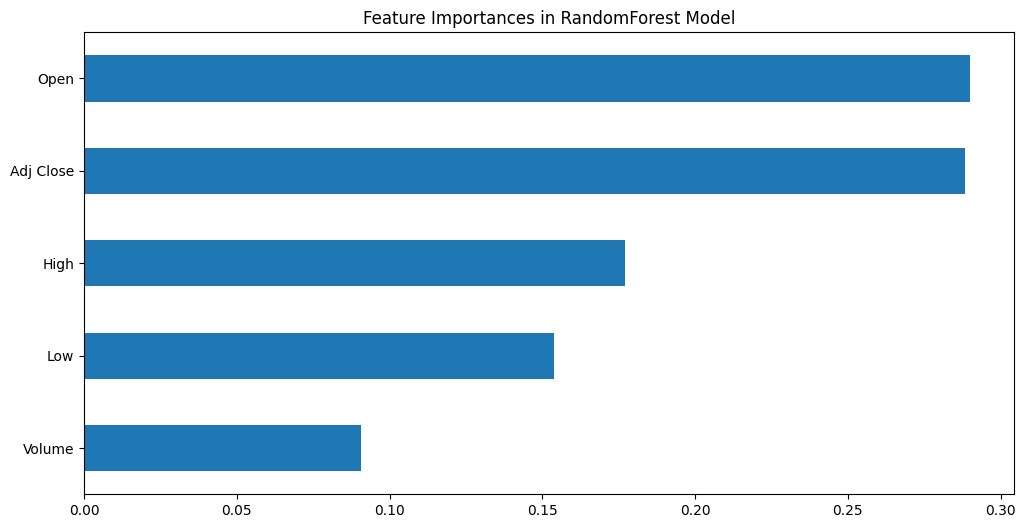

In [ ]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(12, 6))
feature_importances.sort_values().plot(kind='barh')
plt.title('Feature Importances in RandomForest Model')
plt.show()


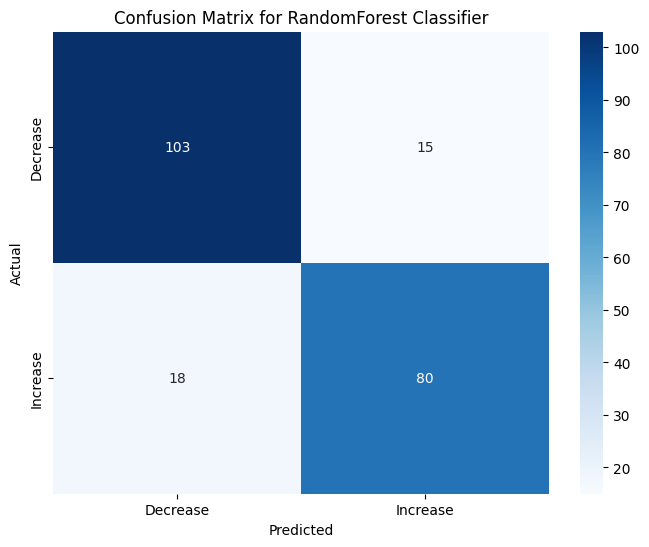

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Decrease', 'Increase'], yticklabels=['Decrease', 'Increase'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Classific for RandomForest Classifier')
plt.show()


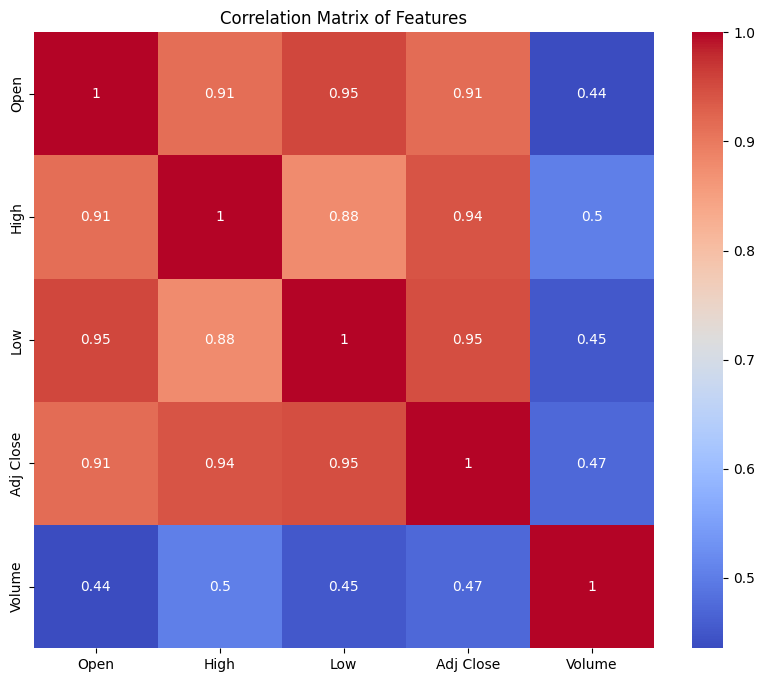

In [ ]:
correlation_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()


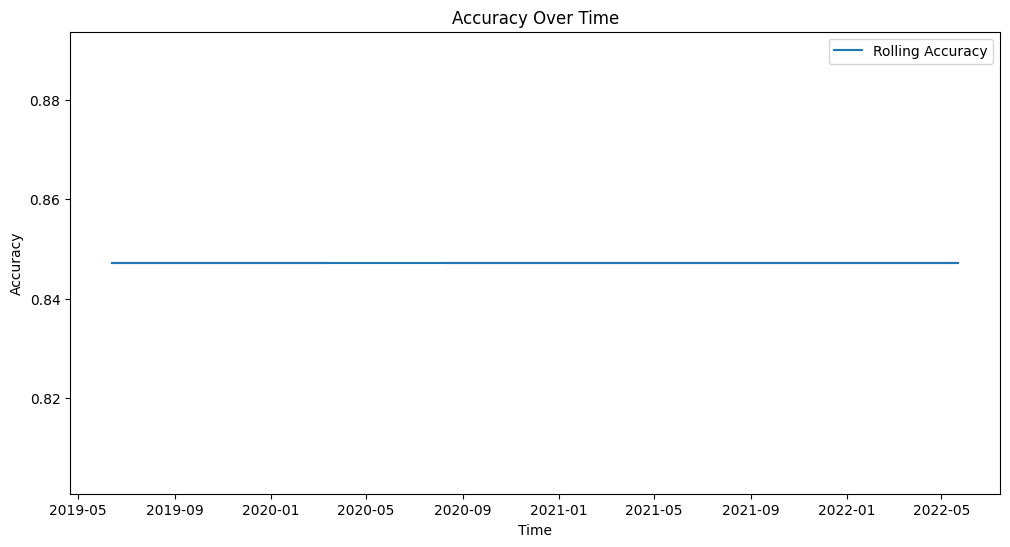

In [ ]:
# Simulating a plot for accuracy loss over time
# For illustrative purposes only (assumes you have a way to calculate rolling accuracy)
rolling_accuracy = [accuracy_score(y_test, y_pred) for _ in range(len(y_test))]  # Simplified placeholder

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, rolling_accuracy, label='Rolling Accuracy')
plt.title('Accuracy Over Time')
plt.xlabel('Time')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


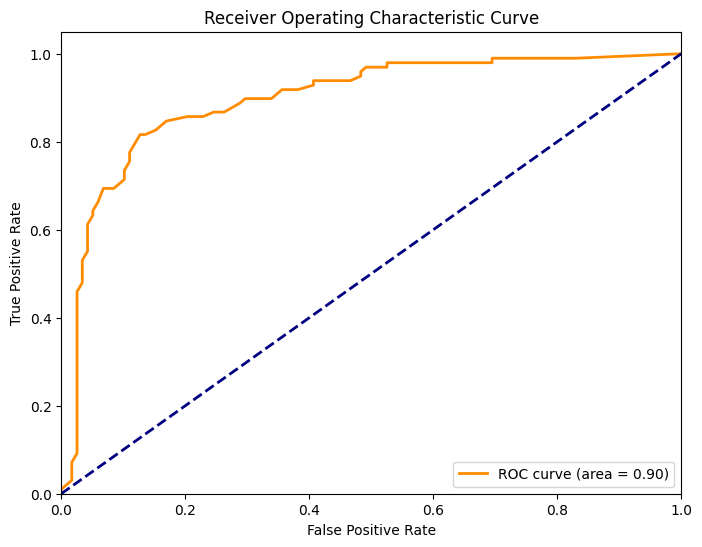

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()


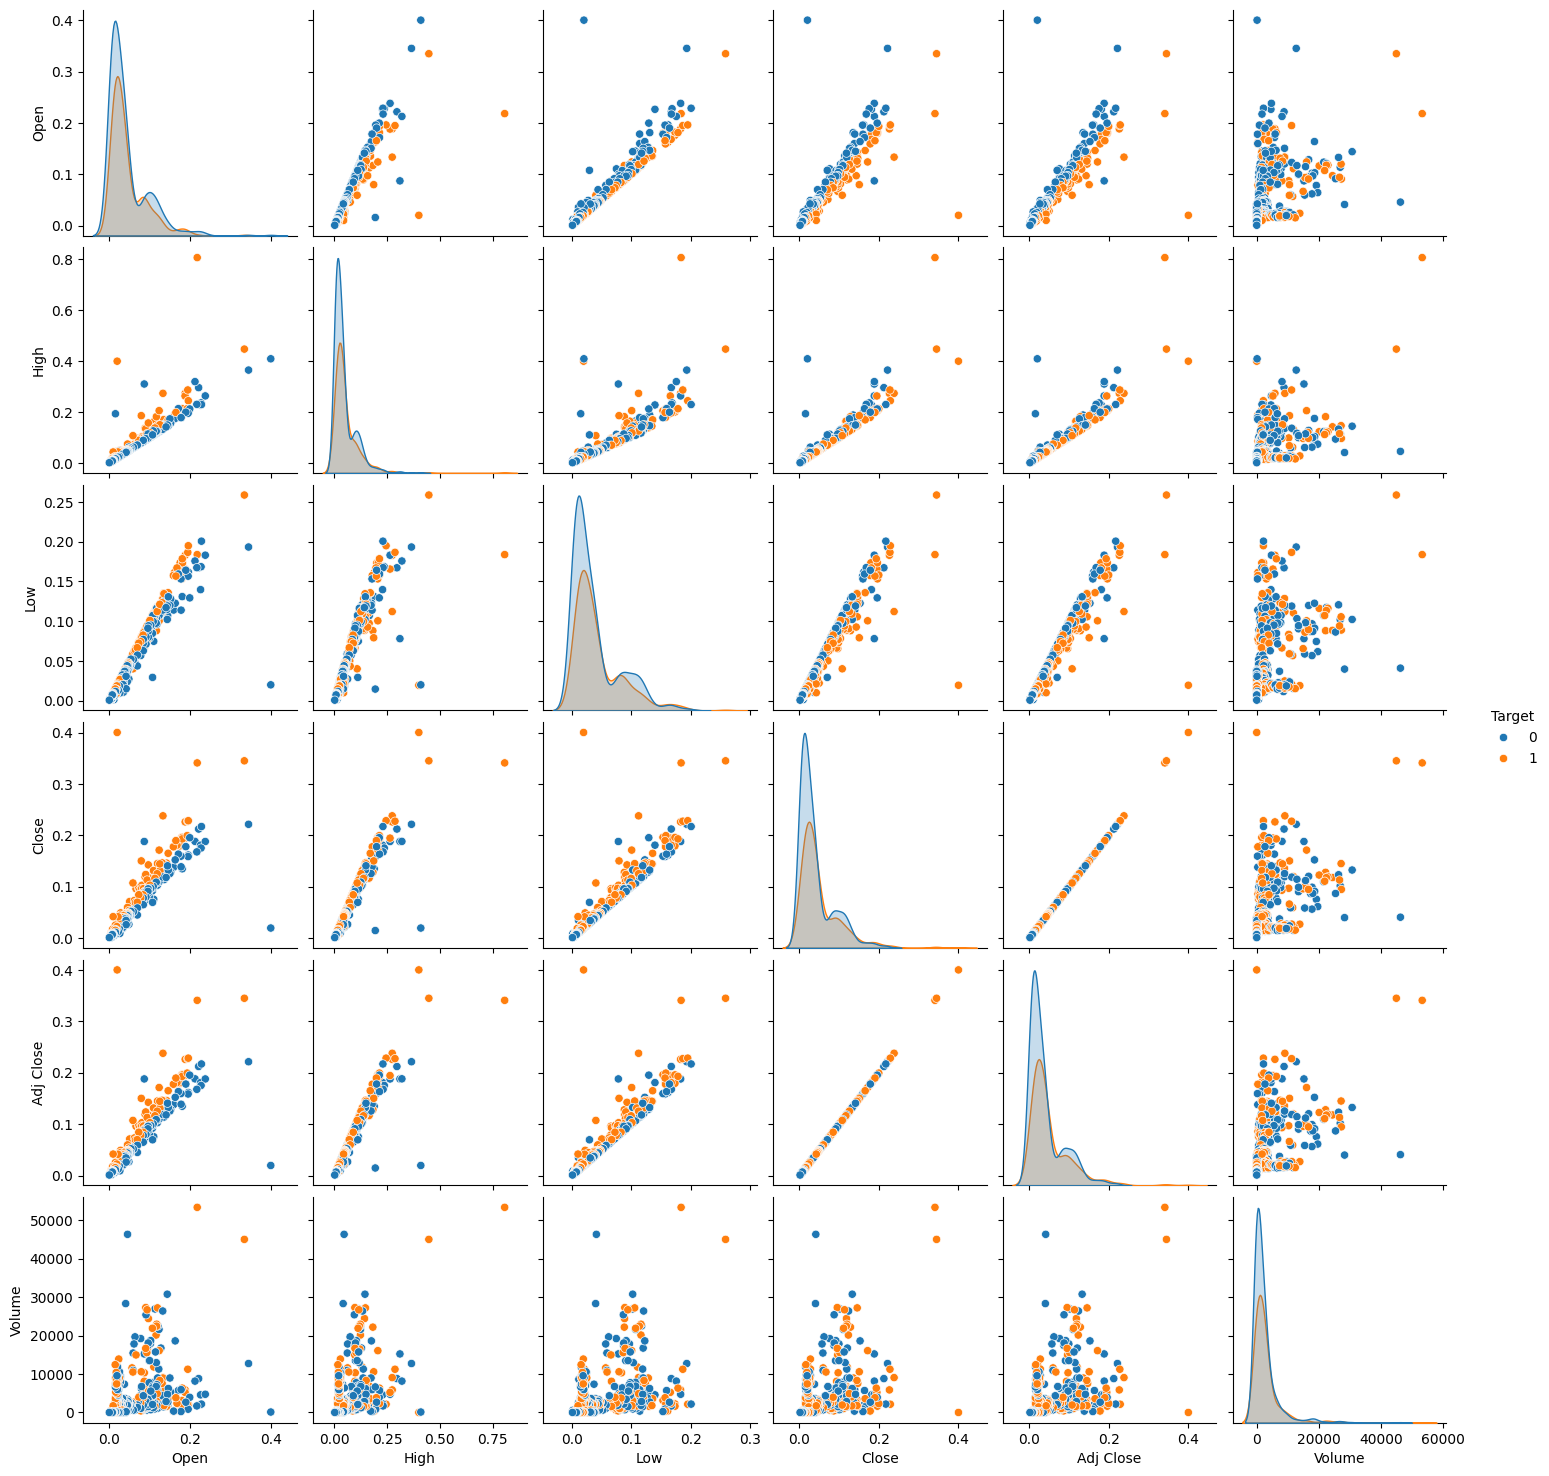

In [ ]:
sns.pairplot(data,hue='Target')

## DecisionTreeClassifier

In [3]:
from sklearn.model_selection import train_test_split

# Defining features and target
X = data.drop(['Target', 'Close'], axis=1)  # Drop 'Close' if it's not to be used as a feature
y = data['Target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Predicting the test results
y_pred = dt_model.predict(X_test)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8148148148148148
[[97 21]
 [19 79]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       118
           1       0.79      0.81      0.80        98

    accuracy                           0.81       216
   macro avg       0.81      0.81      0.81       216
weighted avg       0.82      0.81      0.81       216



## GrasientBoostingClassifier

In [8]:
from sklearn.model_selection import train_test_split

# Defining features and target
X = data.drop(['Target', 'Close'], axis=1)  # Drop 'Close' if it's not to be used as a feature
y = data['Target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions
y_pred_gb = gb_model.predict(X_test)

# Accuracy and classification report
print("Gradient Boosting Model Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))



Gradient Boosting Model Accuracy: 0.8287037037037037
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       118
           1       0.81      0.82      0.81        98

    accuracy                           0.83       216
   macro avg       0.83      0.83      0.83       216
weighted avg       0.83      0.83      0.83       216

